In this notebook we have load our preprocess data which we done in our previous part and now will train the model on different Classification algorithm:



# Step 1: Import all the required libraries
- Pandas : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- Sklearn : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- Pickle : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



In [1]:
# import all required libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import pandas as pd
import warnings
from sklearn import preprocessing
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Read preprocess csv file
df = pd.read_csv('df2.csv')

In [3]:
# Drop Unnamed: 0 column 
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.02454,0.01114,0.2060
565,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01678,0.01898,0.2572
566,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01557,0.01318,0.2218
567,1,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.01664,0.02324,0.4087


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  concave points_se       569 non-null    float64
 12  symmetry_se             569 non-null    float64
 13  symmetry_worst          569 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 62.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step

1. Now we gonna spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset
3. Scaling on train dataset

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [6]:
# Spearate target and feature column in X and y variable
target = 'diagnosis'
X = df.drop(target,axis=1)
y = df[target]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   smoothness_mean         569 non-null    float64
 3   compactness_mean        569 non-null    float64
 4   symmetry_mean           569 non-null    float64
 5   fractal_dimension_mean  569 non-null    float64
 6   radius_se               569 non-null    float64
 7   texture_se              569 non-null    float64
 8   smoothness_se           569 non-null    float64
 9   compactness_se          569 non-null    float64
 10  concave points_se       569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  symmetry_worst          569 non-null    float64
dtypes: float64(13)
memory usage: 57.9 KB


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [9]:
# Check the shape of X and y variable
X.shape, y.shape

((569, 13), (569,))

In [10]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [11]:
# Again check the shape of X and y variable
X.shape, y.shape

((569, 13), (569, 1))

2. Split dataset into train and test dataset

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training and 20% goes into testing the part.*

In [12]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (114, 13), (455, 1), (114, 1))

# Step 3: Model Training

**Goal:- In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in continous format so we have to apply classification algorithm as our target varibal is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm**

*Algorithms we are going to use in this step.*

1. Logistic Regression
2. Nearest Neighbor
3. Random Forest Classification 

In [14]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. **Logistic Regression**

**Train set cross-validation**

In [15]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression()

log_R.fit(X_train, y_train)


LogisticRegression()

In [16]:
#accuracy check of trainig data
#Get R2 score
log_R.score(X_train, y_train)


0.9032967032967033

In [17]:
#accuracy of test data
log_R.score(X_test, y_test) 

0.9210526315789473

In [18]:
# get kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.29488391, 0.29488391, 0.25537696, 0.36115756, 0.39009475,
       0.39440532, 0.2981424 , 0.33333333, 0.2981424 , 0.2981424 ])

In [19]:
# mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train


0.32185629351138245

# **Predict**

In [20]:
# predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

In [21]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [22]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(33.0, 0.5, 'True Class')

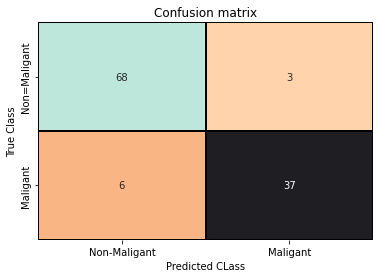

In [23]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

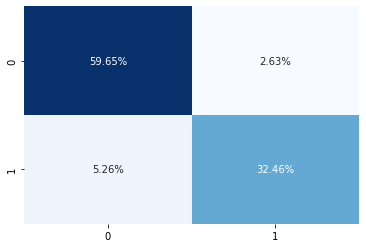

In [24]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)


# Building all kinds of evaluating parameters

In [25]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Logistic Regression")
  
acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
  

The model used is Logistic Regression

The accuracy is 0.9210526315789473
The precision is 0.925
The recall is 0.8604651162790697
The F1-Score is 0.891566265060241


# 2. Nearest Neighbor

In [26]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
#accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)


0.9032967032967033

In [28]:
#accuracy of test data
classifier.score(X_test, y_test) 

0.9122807017543859

In [29]:
# get kfold values
Nn_scores = -1 * cross_val_score(classifier, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores



array([0.36115756, 0.32969024, 0.32969024, 0.39009475, 0.32969024,
       0.36514837, 0.2981424 , 0.36514837, 0.25819889, 0.39440532])

In [30]:
# mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.3421366367114397

# **Predict**

In [31]:
# predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [32]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [33]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(33.0, 0.5, 'True Class')

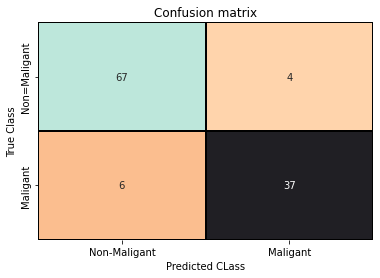

In [34]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

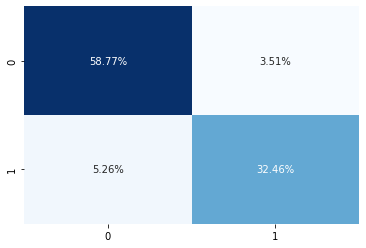

In [35]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)


# Building all kinds of evaluating parameters

In [36]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is KNeighbors Classifier")
  
acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
  

The model used is KNeighbors Classifier

The accuracy is 0.9122807017543859
The precision is 0.9024390243902439
The recall is 0.8604651162790697
The F1-Score is 0.8809523809523809


# 3. Decision Tree Algorithm

In [37]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [38]:
#accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [39]:
#accuracy of test data
clas.score(X_test, y_test) 

0.9385964912280702

In [40]:
# get kfold values
Dta_scores = -1 * cross_val_score(clas, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores



array([0.14744196, 0.32969024, 0.20851441, 0.20851441, 0.25537696,
       0.25819889, 0.2981424 , 0.21081851, 0.21081851, 0.21081851])

In [41]:
# mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.2338334798975374

# PREDICT

In [42]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [43]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [44]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(33.0, 0.5, 'True Class')

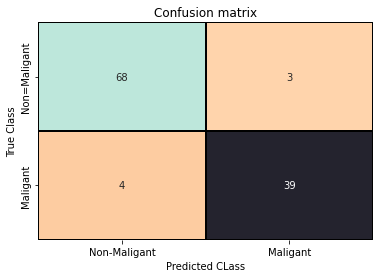

In [45]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

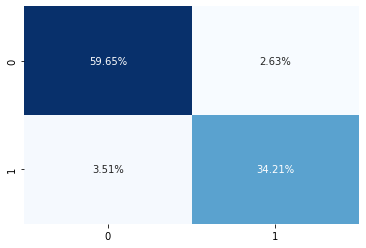

In [46]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)


# Building all kinds of evaluating parameters

In [47]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest Classifier")
  
acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
  

The model used is Random Forest Classifier

The accuracy is 0.9385964912280702
The precision is 0.9285714285714286
The recall is 0.9069767441860465
The F1-Score is 0.9176470588235294


# Insight:
- As you can see with our Random Forest Model(0.9298 or 92.98%) we are getting a better result even for the recall (0.9069 or 90.69%) which is the most tricky part.
- So we gonna save our model with Random Forest Algorithm


# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**



In [48]:
import pickle
pickle.dump(clas , open('breast_cancer_prognosis.pkl', 'wb'))



In [49]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('breast_cancer_prognosis.pkl', 'rb'))
    Diagnosis = str(list(pickled_model.predict(features)))
    
    return str(f'The diagnosis is {Diagnosis}')

Features or X test

In [50]:
radius_mean = 20.57
texture_mean = 17.77
smoothness_mean = 0.08474
compactness_mean = 0.07864
symmetry_mean = 0.1812
fractal_dimension_mean = 0.05667
radius_se = 0.5435
texture_se =  0.7339
smoothness_se = 0.005225
compactness_se = 0.01308
concavepoints_se = 0.0134
symmetry_se = 0.01389
symmetry_worst = 0.275



In [51]:
model_prediction([[radius_mean, texture_mean, smoothness_mean, compactness_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, smoothness_se, compactness_se, concavepoints_se, symmetry_se, symmetry_worst]])

'The diagnosis is [1]'

1 ~ M = malignant, 0 ~ B = benign

# Insights/Results/Summary:-
In this step we save our model in pickel file format so we can use it now anywhere for prediction purpose


